<a href="https://colab.research.google.com/github/Rohan5076/Capstone_Project_1_Propensity_Model/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#making dataframe and getting top 10 entries
df = pd.read_csv("/content/drive/MyDrive/All CSV files/dineout1_final.csv")
df.head()

,web-scraper-order,web-scraper-start-url,links,links-href,reat_name,address,cuisine,type,avg_cost,bestselling_items,facilities_features,contact,ratings,reviesws,votes,timing,pages,pages-href
0,1655559589-973,https://www.dineout.co.in/bangalore-restaurant...,Idli Master,https://www.dineout.co.in/bangalore/idli-maste...,Idli Master,Electronic City |,Chinese,QSR,400 for two people,NaN,Home Delivery,8971308018,NaN,NaN,NaN,Time: 07:30 AM to 10:30 PM (Open Now)Sunday07:...,NaN,NaN
1,1655557693-635,https://www.dineout.co.in/bangalore-restaurant...,Volga,https://www.dineout.co.in/bangalore/volga-elec...,Volga,Ananda Reddy Building |,North Indian,Casual Dining,500 for two people,"Kerala Parotta, Tandoori Chicken",Home Delivery,8095891017,NaN,NaN,NaN,Time: 11:30 AM to 11:30 PM (Open Now)Sunday11:...,NaN,NaN
2,1655565187-1956,https://www.dineout.co.in/bangalore-restaurant...,Savoury Restaurant,https://www.dineout.co.in/bangalore/savoury-re...,Savoury Restaurant,CV Raman Nagar |,Arabian,Casual Dining,800 for two people,NaN,Air Conditioned,8042200077,NaN,NaN,NaN,Time: 12:00 PM to 12:00 AM (Open Now)Sunday12:...,NaN,NaN
3,1655580826-4297,https://www.dineout.co.in/bangalore-restaurant...,Ocean,https://www.dineout.co.in/bangalore/ocean-kora...,Ocean,Koramangala |,Continental,Casual Dining,"1,000 for two people",NaN,Air Conditioned,080-41435672,4.4,4 reviews,12 Votes,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...,NaN,NaN
4,1655564522-1831,https://www.dineout.co.in/bangalore-restaurant...,Chatori Gali,https://www.dineout.co.in/bangalore/chatori-ga...,Chatori Gali,JP Nagar |,Chinese,QSR,800 for two people,NaN,Air Conditioned,9980370364,NaN,NaN,NaN,Time: 06:00 AM to 10:30 PM (Open Now)Sunday06:...,NaN,NaN


In [ ]:
#info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      6131 non-null   object 
 1   web-scraper-start-url  6131 non-null   object 
 2   links                  6131 non-null   object 
 3   links-href             6131 non-null   object 
 4   reat_name              6131 non-null   object 
 5   address                6131 non-null   object 
 6   cuisine                6021 non-null   object 
 7   type                   6130 non-null   object 
 8   avg_cost               6003 non-null   object 
 9   bestselling_items      1932 non-null   object 
 10  facilities_features    5096 non-null   object 
 11  contact                5922 non-null   object 
 12  ratings                3013 non-null   float64
 13  reviesws               1943 non-null   object 
 14  votes                  2695 non-null   object 
 15  timi

In [ ]:
#shape of dataframe
df.shape

(6131, 18)

In [ ]:
#delete entire columns in dataframe
df.drop(df.columns[[1,2,13,14,16,17]],axis=1, inplace=True)

In [ ]:
#change the name of column
df.rename(columns = {'reat_name':'resto_name'}, inplace = True)

In [ ]:
#while doing all the changes first 10 entries in dataframe
df.head()

,web-scraper-order,links-href,resto_name,address,cuisine,type,avg_cost,bestselling_items,facilities_features,contact,ratings,timing
0,1655559589-973,https://www.dineout.co.in/bangalore/idli-maste...,Idli Master,Electronic City |,Chinese,QSR,400 for two people,NaN,Home Delivery,8971308018,NaN,Time: 07:30 AM to 10:30 PM (Open Now)Sunday07:...
1,1655557693-635,https://www.dineout.co.in/bangalore/volga-elec...,Volga,Ananda Reddy Building |,North Indian,Casual Dining,500 for two people,"Kerala Parotta, Tandoori Chicken",Home Delivery,8095891017,NaN,Time: 11:30 AM to 11:30 PM (Open Now)Sunday11:...
2,1655565187-1956,https://www.dineout.co.in/bangalore/savoury-re...,Savoury Restaurant,CV Raman Nagar |,Arabian,Casual Dining,800 for two people,NaN,Air Conditioned,8042200077,NaN,Time: 12:00 PM to 12:00 AM (Open Now)Sunday12:...
3,1655580826-4297,https://www.dineout.co.in/bangalore/ocean-kora...,Ocean,Koramangala |,Continental,Casual Dining,"1,000 for two people",NaN,Air Conditioned,080-41435672,4.4,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
4,1655564522-1831,https://www.dineout.co.in/bangalore/chatori-ga...,Chatori Gali,JP Nagar |,Chinese,QSR,800 for two people,NaN,Air Conditioned,9980370364,NaN,Time: 06:00 AM to 10:30 PM (Open Now)Sunday06:...


In [ ]:
#shape of previous data
df.shape

(6131, 12)

In [ ]:
#to find and count of null values 
df.isnull().sum()

web-scraper-order         0
links-href                0
resto_name                0
address                   0
cuisine                 110
type                      1
avg_cost                128
bestselling_items      4199
facilities_features    1035
contact                 209
ratings                3118
timing                  154
dtype: int64

In [ ]:
#to getting unique values in dataframe
df.nunique()

web-scraper-order      6131
links-href             6131
resto_name             3485
address                 757
cuisine                  60
type                     83
avg_cost                 71
bestselling_items      1527
facilities_features      12
contact                5199
ratings                  35
timing                  953
dtype: int64

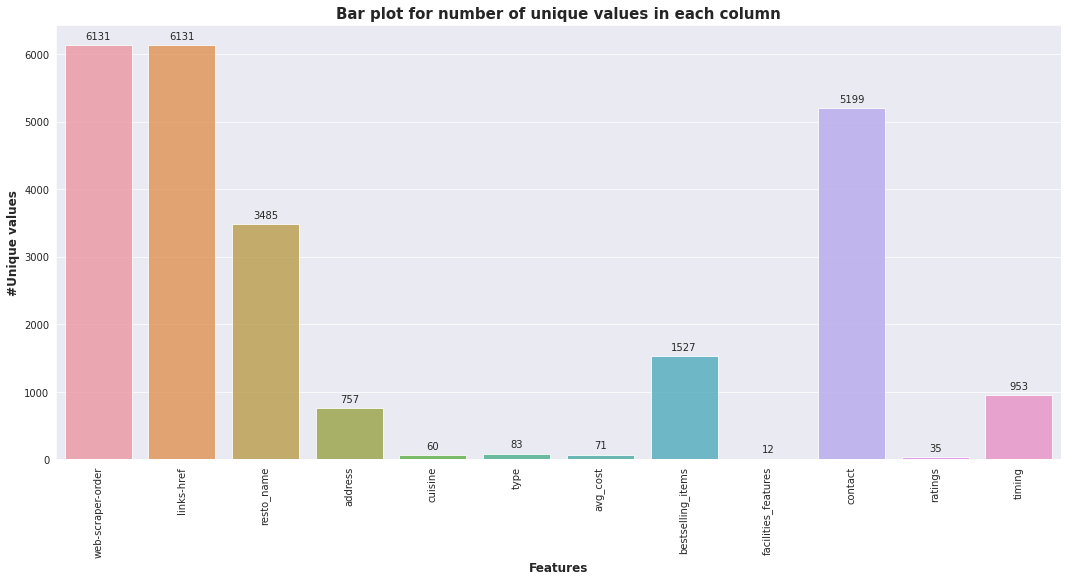

In [ ]:
#Represent the bar plot of unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(18,8))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#to find count of restorent in area wise 
df1 =df.groupby(['address']) ['resto_name'].aggregate('count').reset_index().sort_values('resto_name', ascending=False)
df1.rename(columns= {'resto_name':'No_of_resto'}, inplace= True)

In [ ]:
#unique values in address and restorent
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 328 to 756
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   address      757 non-null    object
 1   No_of_resto  757 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


In [ ]:
display(df1)

,address,No_of_resto
328,Koramangala |,324
264,Indiranagar |,256
750,Whitefield |,252
383,Marathahalli |,233
208,HSR Layout |,204
...,...,...
443,Panchanjanya Tower |,1
441,Pai Viceroy Hotel |,1
440,Padmashri Arcade |,1
439,Padmalaya Building |,1


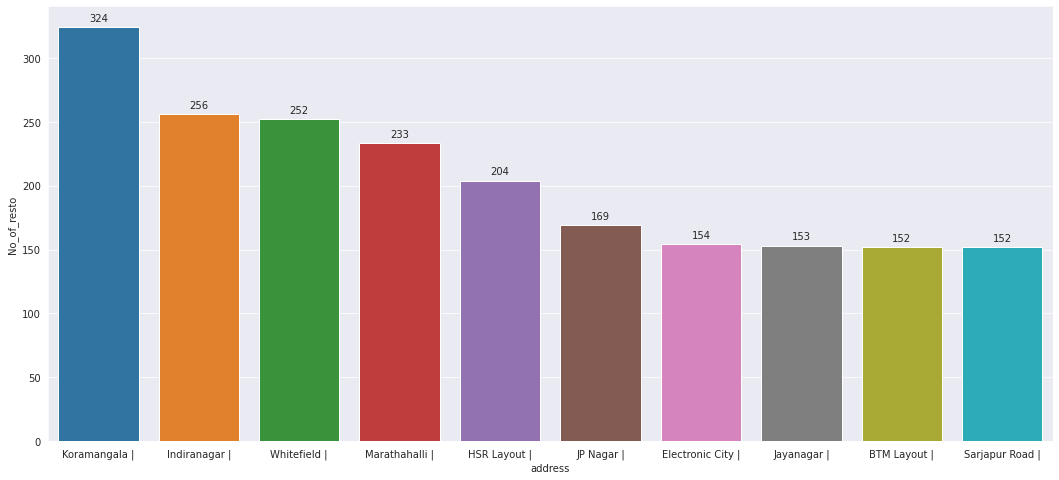

In [ ]:
#ploting the bar plot of area vs count of restorent
import seaborn as sns
sns.set_style('darkgrid')
fig, ax= plt.subplots(figsize= (18,8))
splot=sns.barplot(x='address', y='No_of_resto', data= df1.head(10), ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')

In [ ]:
##to find count of address in type wise 
df2 = df.groupby(['type']) ['address'].aggregate('count').reset_index().sort_values('address', ascending=False)

In [ ]:
#change the name of column which is address to count
df2.rename(columns = {'address':'count'}, inplace = True)

In [ ]:
#display the type and count
display(df2)

,type,count
78,QSR,2218
45,Casual Dining,2092
33,Cafe,456
81,"QSR, Food Court",148
79,"QSR, Bakery",144
...,...,...
55,Deli,1
62,"Food Court, Dessert Parlour",1
24,"5 Star, Microbrewery",1
38,"Cafe, Deli",1


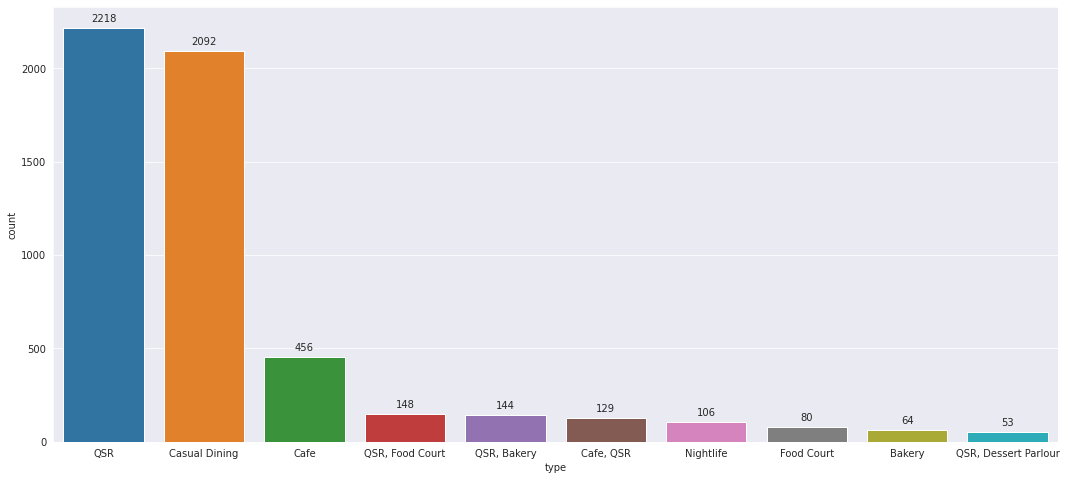

In [ ]:
#ploting the bar plot of type vs count of restorent 
import seaborn as sns
sns.set_style('darkgrid')
fig, ax= plt.subplots(figsize= (18,8))
splot=sns.barplot(x='type', y='count', data= df2.head(10), ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')

# **We will having only data of Cafe**

In [ ]:
#getting only cafe in dataframe by using loc function
df3 = (df.loc[df['type'] == 'Cafe'])

In [ ]:
#top 5 entries of cafe 
df3.head()

,web-scraper-order,links-href,resto_name,address,cuisine,type,avg_cost,bestselling_items,facilities_features,contact,ratings,timing
16,1655577831-3697,https://www.dineout.co.in/bangalore/brewz-coff...,Brewz Coffee,BTM Layout |,Fast Food,Cafe,700 for two people,"French Fries, Cafe Latte, Chicken Tikka, Mac C...",Air Conditioned,7899963628,5.0,Time: (Opens at 10:30 AM)Sunday10:30 AM to 10...
32,1655574323-3132,https://www.dineout.co.in/bangalore/dscam-jaya...,Dscam,Jayanagar |,Fast Food,Cafe,800 for two people,NaN,Home Delivery,9980698657,NaN,Time: (Opens at 11:00 AM)Sunday11:00 AM to 08...
38,1655592505-6449,https://www.dineout.co.in/bangalore/aubree-kor...,Aubree,Koramangala |,Desserts,Cafe,800 for two people,"Red Velvet, Brownie Sundae, Chocolate Truffles...",Air Conditioned,9611117777,4.6,Time: (Opens at 09:30 AM)Sunday09:30 AM to 12...
51,1655582568-4665,https://www.dineout.co.in/bangalore/american-b...,American Bites,Sarjapur Road |,Fast Food,Cafe,500 for two people,"Veg Pizza, Tomato Pizza, Onion Pizza, French F...",Home Delivery,8095956969,5.0,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
55,1655567166-2302,https://www.dineout.co.in/bangalore/eunoia-caf...,Eunoia Cafe,Kalyan Nagar |,Fast Food,Cafe,400 for two people,NaN,Air Conditioned,080-9611833392,NaN,Time: 11:00 AM to 11:00 PM (Open Now)Sunday11:...


In [ ]:
#info of cafe wise
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 16 to 6127
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   web-scraper-order    456 non-null    object 
 1   links-href           456 non-null    object 
 2   resto_name           456 non-null    object 
 3   address              456 non-null    object 
 4   cuisine              456 non-null    object 
 5   type                 456 non-null    object 
 6   avg_cost             456 non-null    object 
 7   bestselling_items    217 non-null    object 
 8   facilities_features  436 non-null    object 
 9   contact              446 non-null    object 
 10  ratings              279 non-null    float64
 11  timing               441 non-null    object 
dtypes: float64(1), object(11)
memory usage: 46.3+ KB


In [ ]:
##to find count of area wise cafe in banglore we group by type  
df4 = df3.groupby(['address']) ['type'].aggregate('count').reset_index().sort_values('type', ascending=False)

In [ ]:
#rename column name type to count
df4.rename(columns = {'type':'no_of_resto'}, inplace = True)
df4.head(10)

,address,no_of_resto
71,Koramangala |,46
52,Indiranagar |,32
45,HSR Layout |,21
60,Jayanagar |,20
65,Kalyan Nagar |,17
138,Whitefield |,14
103,Rajarajeshwari Nagar |,13
121,Sarjapur Road |,12
55,JP Nagar |,11
139,Yelahanka |,9


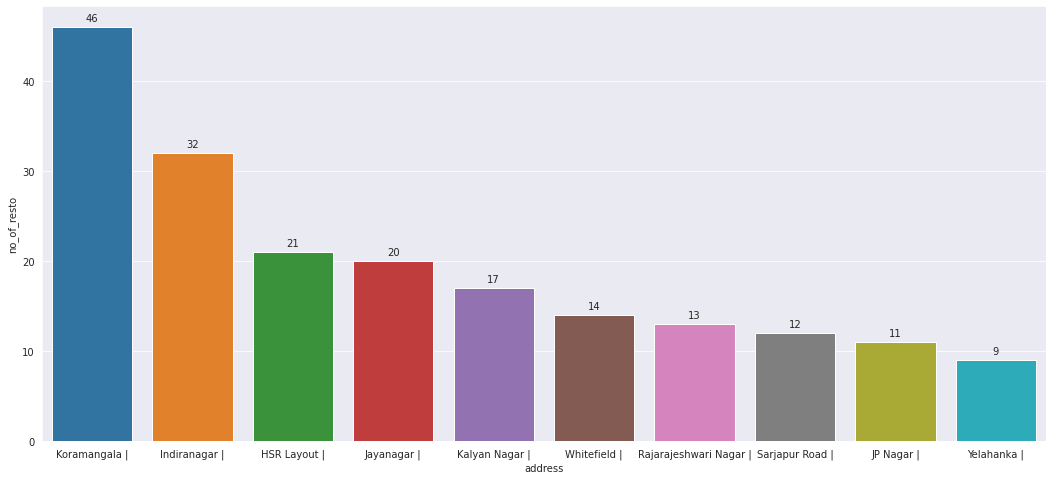

In [ ]:
#ploting the bar plot of address vs count of cafe
import seaborn as sns
sns.set_style('darkgrid')
fig, ax= plt.subplots(figsize= (18,8))
splot= sns.barplot(x='address', y='no_of_resto', data= df4.head(10), ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')

In [ ]:
#sort values in restorent
df4.sort_values('no_of_resto', inplace = True, ascending= False)

In [ ]:
df5 = df4.head()

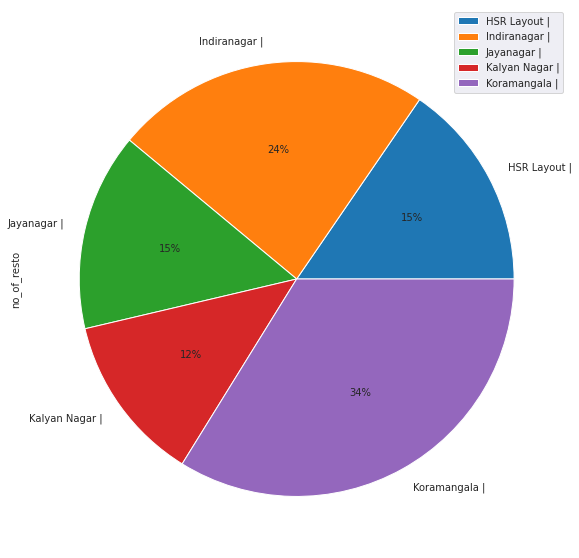

In [ ]:
# Plotting the pie chart for above dataframe
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(22, 10))
df5.groupby(['address']).sum().head().plot(kind='pie', y='no_of_resto', autopct='%1.0f%%', ax=ax)

In [ ]:
##to find count of area wise cafe in banglore we group by type  
df6 = df3.groupby(['resto_name']) ['type'].aggregate('count').reset_index().sort_values('type', ascending=False)

In [ ]:
#rename columns name type to count
df6.rename(columns = {'type':'count'}, inplace = True)

In [ ]:
display(df6)

,resto_name,count
53,Cafe Coffee Day,54
271,Starbucks,8
323,Third Wave Coffee Roasters,8
96,Chef Baker's,8
20,Barista,6
...,...,...
121,De LAWN,1
120,Dark Knight Lounge,1
119,D'hide Cafe,1
118,D'Cafe,1


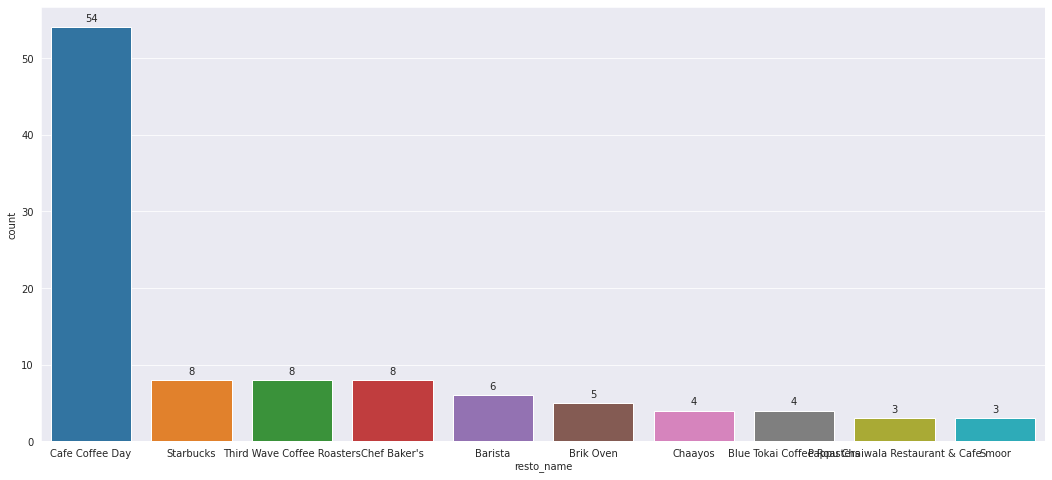

In [ ]:
#ploting the bar plot of area vs count of restorent
import seaborn as sns
sns.set_style('darkgrid')
fig, ax= plt.subplots(figsize= (18,8))
splot=sns.barplot(x='resto_name', y='count', data= df6.head(10), ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')

# We can see area wise average spending 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 16 to 6127
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   web-scraper-order    456 non-null    object 
 1   links-href           456 non-null    object 
 2   resto_name           456 non-null    object 
 3   address              456 non-null    object 
 4   cuisine              456 non-null    object 
 5   type                 456 non-null    object 
 6   avg_cost             456 non-null    object 
 7   bestselling_items    217 non-null    object 
 8   facilities_features  436 non-null    object 
 9   contact              446 non-null    object 
 10  ratings              279 non-null    float64
 11  timing               441 non-null    object 
dtypes: float64(1), object(11)
memory usage: 46.3+ KB


In [ ]:
#Convert avg cost to numeric form
df3['avg_cost'] = df3['avg_cost'].str.rstrip('for two people')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head()

,web-scraper-order,links-href,resto_name,address,cuisine,type,avg_cost,bestselling_items,facilities_features,contact,ratings,timing
16,1655577831-3697,https://www.dineout.co.in/bangalore/brewz-coff...,Brewz Coffee,BTM Layout |,Fast Food,Cafe,700,"French Fries, Cafe Latte, Chicken Tikka, Mac C...",Air Conditioned,7899963628,5.0,Time: (Opens at 10:30 AM)Sunday10:30 AM to 10...
32,1655574323-3132,https://www.dineout.co.in/bangalore/dscam-jaya...,Dscam,Jayanagar |,Fast Food,Cafe,800,NaN,Home Delivery,9980698657,NaN,Time: (Opens at 11:00 AM)Sunday11:00 AM to 08...
38,1655592505-6449,https://www.dineout.co.in/bangalore/aubree-kor...,Aubree,Koramangala |,Desserts,Cafe,800,"Red Velvet, Brownie Sundae, Chocolate Truffles...",Air Conditioned,9611117777,4.6,Time: (Opens at 09:30 AM)Sunday09:30 AM to 12...
51,1655582568-4665,https://www.dineout.co.in/bangalore/american-b...,American Bites,Sarjapur Road |,Fast Food,Cafe,500,"Veg Pizza, Tomato Pizza, Onion Pizza, French F...",Home Delivery,8095956969,5.0,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
55,1655567166-2302,https://www.dineout.co.in/bangalore/eunoia-caf...,Eunoia Cafe,Kalyan Nagar |,Fast Food,Cafe,400,NaN,Air Conditioned,080-9611833392,NaN,Time: 11:00 AM to 11:00 PM (Open Now)Sunday11:...


In [ ]:
#rename the column name avg_cost to avg_cost_for_two
df3.rename(columns = {'avg_cost':'avg_cost_for_two'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 16 to 6127
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   web-scraper-order    456 non-null    object 
 1   links-href           456 non-null    object 
 2   resto_name           456 non-null    object 
 3   address              456 non-null    object 
 4   cuisine              456 non-null    object 
 5   type                 456 non-null    object 
 6   avg_cost_for_two     456 non-null    object 
 7   bestselling_items    217 non-null    object 
 8   facilities_features  436 non-null    object 
 9   contact              446 non-null    object 
 10  ratings              279 non-null    float64
 11  timing               441 non-null    object 
dtypes: float64(1), object(11)
memory usage: 46.3+ KB


In [ ]:
#Convert avg cost to numeric form
df3['avg_cost_for_two'] = df3['avg_cost_for_two'].replace(['2,100'],'2100')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Convert avg cost to numeric form
df3['avg_cost_for_two'] = df3['avg_cost_for_two'].str.replace(',', '').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#display the data type
df3= df3.astype({'avg_cost_for_two':'int'})
print(df3.dtypes)

web-scraper-order       object
links-href              object
resto_name              object
address                 object
cuisine                 object
type                    object
avg_cost_for_two         int64
bestselling_items       object
facilities_features     object
contact                 object
ratings                float64
timing                  object
dtype: object


In [ ]:
df3.sort_values('avg_cost_for_two', inplace=True, ascending=False)
df3

,web-scraper-order,links-href,resto_name,address,cuisine,type,avg_cost_for_two,bestselling_items,facilities_features,contact,ratings,timing
2530,1655591286-6236,https://www.dineout.co.in/bangalore/cafe-noir-...,Cafe Noir,Orion Mall |,Continental,Cafe,2100,"Peri Peri Fries, Greek Salad, Pizza Pepperoni ...",Air Conditioned,080-22682140,4.3,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
4181,1655587799-5579,https://www.dineout.co.in/bangalore/cafe-noir-...,Cafe Noir,Phoenix Marketcity |,Continental,Cafe,2100,"Asta, Coffee, Mocktails, Sandwiches, Pizza, Ma...",Air Conditioned,080-67266099,4.2,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
5933,1655590333-6024,https://www.dineout.co.in/bangalore/foxtrot-ho...,Foxtrot - House of Subculture,Koramangala |,North Indian,Cafe,1700,"Goat Cheese Salad Chicken Burger, Whisky Sour,...",Smoking Area,9108136002,4.3,Time: (Opens at 12:00 PM)Sunday12:00 PM to 08...
1388,1655585067-5133,https://www.dineout.co.in/bangalore/hopshaus-w...,Hopshaus,Whitefield |,North Indian,Cafe,1600,"Mutton Kheema Pav,Cajun Seared Fish Sizzler, H...",Serves Alcohol,8861924449,4.2,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
4383,1655580376-4199,https://www.dineout.co.in/bangalore/asia-kitch...,Asia Kitchen by Mainland China,Church Street |,Chinese,Cafe,1600,NaN,Air Conditioned,9343529202,NaN,Time: (Opens at 12:00 PM)Sunday12:00 PM to 03...
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,1655580706-4270,https://www.dineout.co.in/bangalore/pappu-chai...,Pappu Chaiwala Restaurant & Cafe,Nahar Heritage Hotel |,Fast Food,Cafe,300,NaN,Air Conditioned,080-22219009,NaN,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
1448,1655582578-4667,https://www.dineout.co.in/bangalore/chaai-rest...,Chaai Resto,Yelahanka |,Tea,Cafe,200,NaN,Home Delivery,9686983688,NaN,Time: (Opens at 08:30 AM)Sunday08:30 AM to 11...
5805,1655581636-4471,https://www.dineout.co.in/bangalore/corner-hou...,Corner House Ice Creams,Gopal Krishna Complex |,Desserts,Cafe,200,NaN,NaN,080-25550885,4.0,Time: (Opens at 11:00 AM)Sunday11:00 AM to 11...
668,1655584683-5059,https://www.dineout.co.in/bangalore/chaai-rest...,Chaai Resto,HSR Layout |,Tea,Cafe,200,NaN,Home Delivery,9206241905,NaN,Time: (Opens at 07:00 AM)Sunday07:00 AM to 11...


In [ ]:
#for count of area wise avg cost in banglore
df7 = df3.groupby(['address']) ['avg_cost_for_two'].aggregate('median').reset_index().sort_values('avg_cost_for_two', ascending=False)
df7.head(10)

,address,avg_cost_for_two
123,Shah Sultan Complex |,1400.0
36,Former Cinnamon Building |,1200.0
14,Bommasandra |,1200.0
31,Doddanekundi |,1200.0
120,Santosh Tower |,1200.0
101,Race Course Road |,1200.0
69,Kempegowda International Airport |,1200.0
95,Phoenix Marketcity |,1200.0
46,Haralur |,1050.0
28,Deepa Plaza |,1000.0


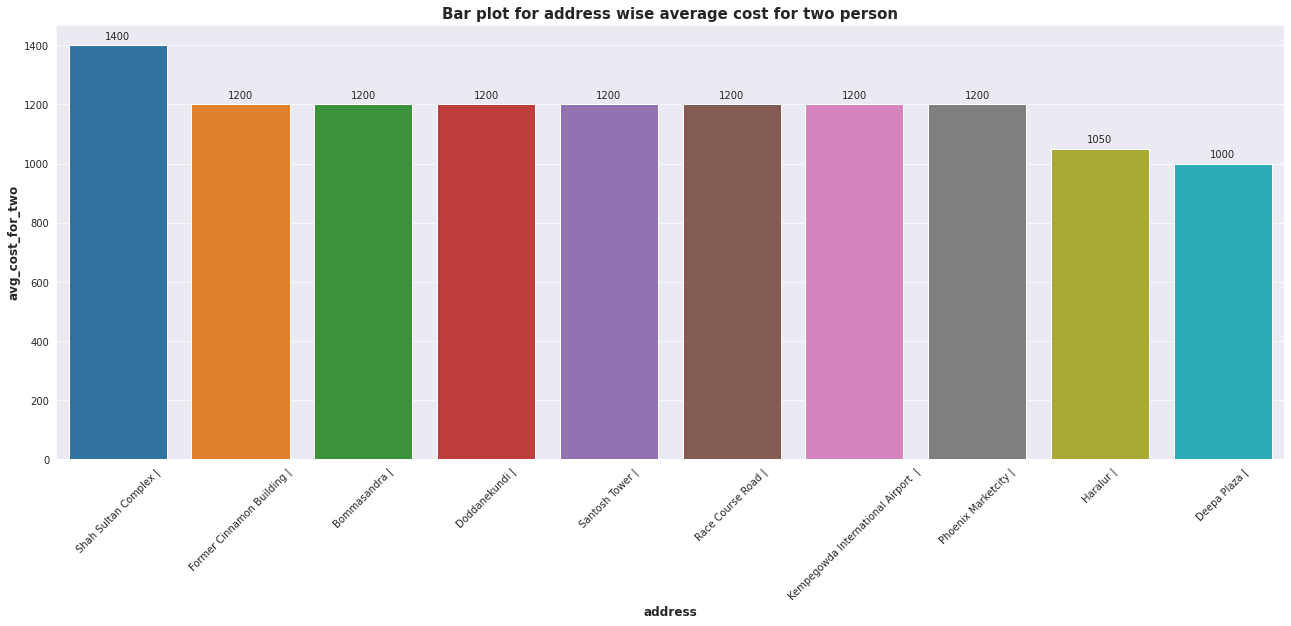

In [ ]:
#ploting the bar plot of area vs count of restorent
import seaborn as sns
sns.set_style('darkgrid')
fig, ax= plt.subplots(figsize= (22,8))
splot=sns.barplot(x='address', y='avg_cost_for_two', data= df7.head(10), ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for address wise average cost for two person',weight='bold', size=15)
plt.ylabel('avg_cost_for_two', size=12, weight='bold')
plt.xlabel('address', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##to find count of bestselling items of cafe in banglore we group by type  
df7 = df3.groupby(['bestselling_items']) ['resto_name'].aggregate('count').reset_index().sort_values('resto_name', ascending=False)
#rename the resto_name to no_of_cafe
df7.rename(columns ={'resto_name':'no_of_cafe'}, inplace = True)

In [ ]:
display(df7)

,bestselling_items,no_of_cafe
53,"Devils Own, Chilli Cheese Toast, Cold Dark Fra...",53
70,"Garlic Bread, Waffles, Wood Fire Pizza, Mushro...",2
44,"Coffee, Hot Chocolate, Hummus Platter, Granola...",2
59,"Flat White, Hot Chocolate,,Mocha,, Classic Col...",2
65,"French Fries, Paneer Cheese Sandwich, Paneer C...",2
...,...,...
54,"Dolci, Dessert, Pasta, Pizza, Grilled Prawns.",1
55,"English Breakfast, American Breakfast, Quattro...",1
56,"English Breakfast, Classic Veggie, Creamy Spin...",1
57,"Espresso, Americano, Cold Coffee, Burger, Samosa.",1


In [ ]:
df9= df7.head(10)

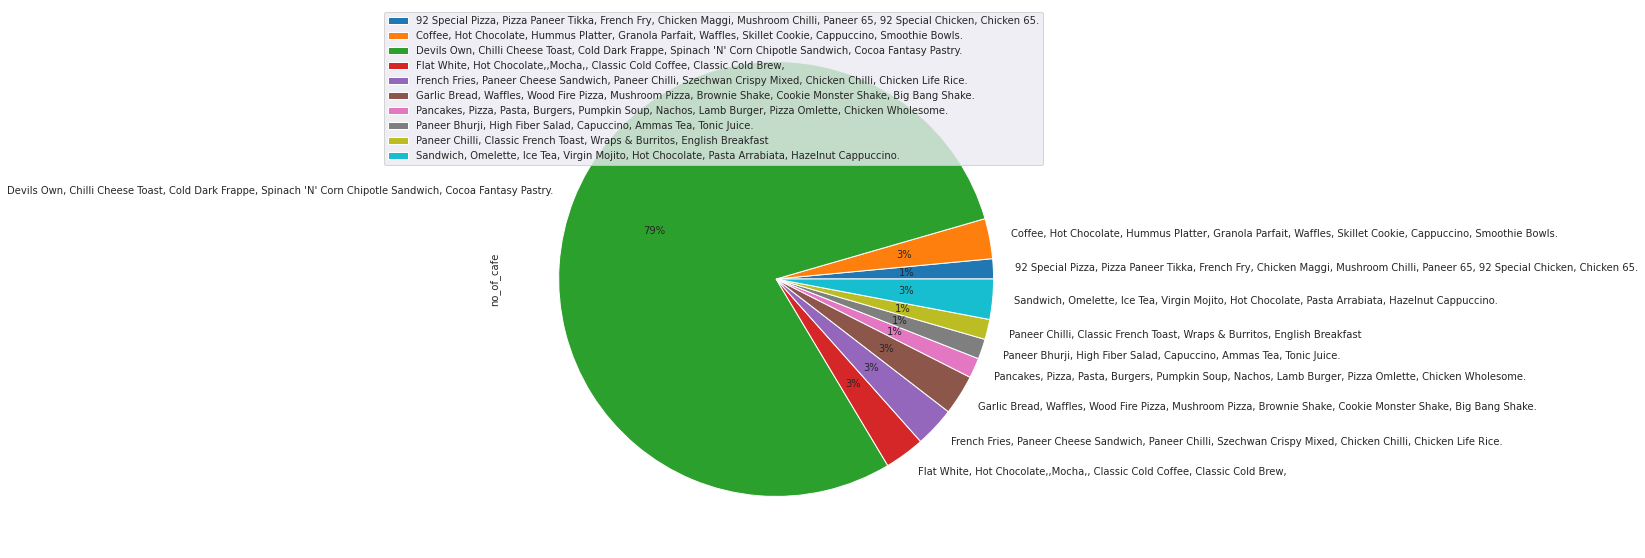

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
df9.groupby(['bestselling_items']).sum().head(10).plot(kind='pie', y='no_of_cafe', autopct='%1.0f%%', ax=ax)

In [ ]:
##to find count of cafe serving diff types of cuisine in banglore  
df8 = df3.groupby(['cuisine']) ['resto_name'].aggregate('count').reset_index().sort_values('resto_name', ascending=False)  
#rename the column name resto_name to count_of_resto
df8.rename(columns ={'resto_name':'count_of_resto'}, inplace = True)

In [ ]:
display(df8)

,cuisine,count_of_resto
9,Fast Food,123
6,Continental,87
3,Beverages,63
14,Italian,36
5,Chinese,32
7,Desserts,29
17,North Indian,23
13,Health Food,14
0,American,14
18,Pizza,8


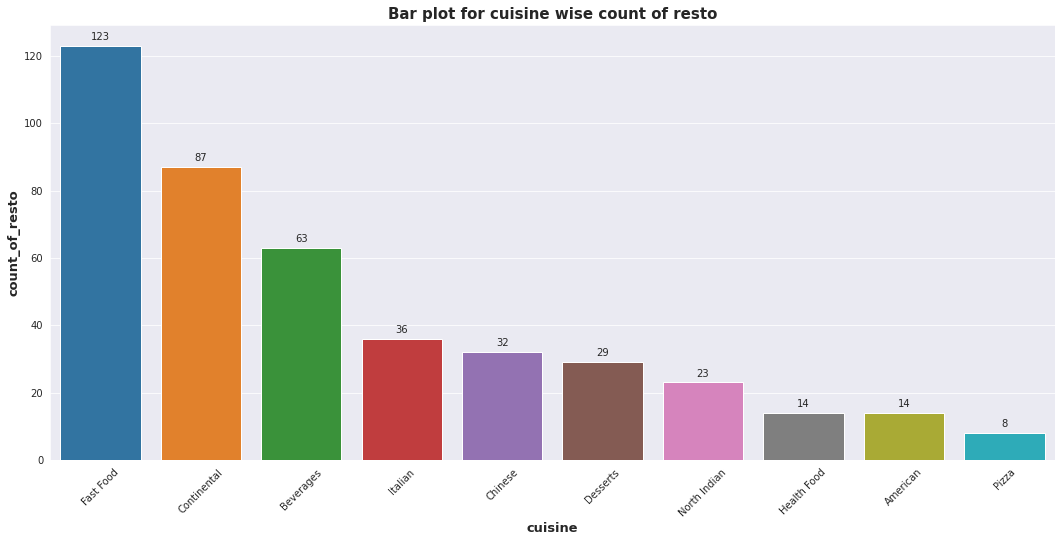

In [ ]:
#ploting the bar plot of area vs count of restorent
import seaborn as sns
sns.set_style('darkgrid')
fig, ax= plt.subplots(figsize= (18,8))
splot=sns.barplot(x='cuisine', y='count_of_resto', data= df8.head(10), ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for cuisine wise count of resto',weight='bold', size=15)
plt.ylabel('count_of_resto', size=13, weight='bold')
plt.xlabel('cuisine', size=13, weight='bold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##to find count of cafe serving diff types of cuisine in banglore  
df10 = df3.groupby(['address']) ['bestselling_items'].aggregate('count').reset_index().sort_values('bestselling_items', ascending=False)  
#rename the column name address to area_wise_best_selling_cuisine
df10.rename(columns ={'address':'area_wise_best_selling_cuisine'}, inplace = True)

In [ ]:
df10.head()

,area_wise_best_selling_cuisine,bestselling_items
71,Koramangala |,27
45,HSR Layout |,14
52,Indiranagar |,12
138,Whitefield |,8
65,Kalyan Nagar |,8


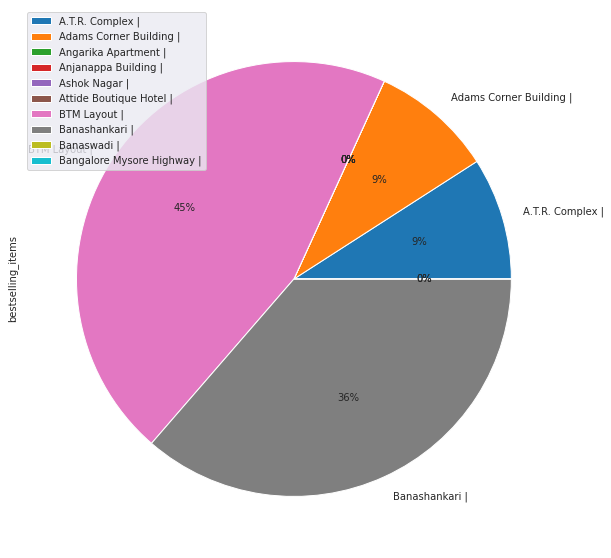

In [ ]:
#pie chart of are wise best selling items
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
df10.groupby(['area_wise_best_selling_cuisine']).sum().head(10).plot(kind='pie', y='bestselling_items', autopct='%1.0f%%', ax=ax)